# Analysis of National Democratic Primary Polling, 2019

Data taken from FiveThirtyEight's aggregation of polls for the 2019 primary.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_raw = pd.read_csv('https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv')

/home/alec/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_raw.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,119723,64740,2020,Washington,460,SurveyUSA,840,KING TV (Seattle),SurveyUSA,325.0,...,False,3/6/20 15:48,NaN,https://www.king5.com/article/news/politics/el...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,36.36
1,119723,64740,2020,Washington,460,SurveyUSA,840,KING TV (Seattle),SurveyUSA,325.0,...,False,3/6/20 15:48,NaN,https://www.king5.com/article/news/politics/el...,primary,DEM,Sanders,13257,Bernard Sanders,35.35
2,119723,64740,2020,Washington,460,SurveyUSA,840,KING TV (Seattle),SurveyUSA,325.0,...,False,3/6/20 15:48,NaN,https://www.king5.com/article/news/politics/el...,primary,DEM,Warren,13258,Elizabeth Warren,10.10
3,119720,64737,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,3/6/20 13:00,NaN,https://morningconsult.com/2020/03/06/democrat...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,54.00
4,119720,64737,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,3/6/20 13:00,NaN,https://morningconsult.com/2020/03/06/democrat...,primary,DEM,Sanders,13257,Bernard Sanders,38.00


# Tasks

### Clean Data
(can fiddle with how to clean in different ways)

1. get a feature for each candidate's percentage for each poll (question id)
2. other features can include many features in the raw data sans the candidate names and percentages. e.g. poll_id, rating, poll name, etc.


### Analyze Data

## Cleaning Process

First, work on step 1 from above cell.


In [4]:
#drop all state polls

indices = data_raw.index

for i in indices:
    if(not data_raw['state'].isna().loc[i]):
        data_raw.drop(axis = 0,index = i,inplace=True)

In [5]:
data_raw.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
3,119720,64737,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,3/6/20 13:00,NaN,https://morningconsult.com/2020/03/06/democrat...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,54.0
4,119720,64737,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,3/6/20 13:00,NaN,https://morningconsult.com/2020/03/06/democrat...,primary,DEM,Sanders,13257,Bernard Sanders,38.0
5,119720,64737,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,3/6/20 13:00,NaN,https://morningconsult.com/2020/03/06/democrat...,primary,DEM,Gabbard,13343,Tulsi Gabbard,2.0
6,119698,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,...,False,3/5/20 15:00,head-to-head poll,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,55.0
7,119698,64727,2020,NaN,744,Ipsos,71,Reuters,Ipsos,154.0,...,False,3/5/20 15:00,head-to-head poll,https://www.ipsos.com/sites/default/files/ct/n...,primary,DEM,Sanders,13257,Bernard Sanders,45.0


In [6]:
question_ids = data_raw['question_id'].unique()

In [7]:
candidates = ['Biden','Sanders']
candidates_pct = []
for candidate in candidates:
    candidates_pct.append(candidate + '-pct')
columns = ['start_date','end_date','sample_size','population','population_full',
                                       'pollster','pollster_id','pollster_grade']
columns += candidates_pct
data_clean = pd.DataFrame(index = question_ids, 
                            columns = columns)

for q_id in question_ids:
    data_clean.loc[q_id]['start_date'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['start_date']
    data_clean.loc[q_id]['end_date'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['end_date']
    data_clean.loc[q_id]['pollster'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['pollster']
    data_clean.loc[q_id]['pollster_id'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['pollster_id']
    data_clean.loc[q_id]['sample_size'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['sample_size']
    data_clean.loc[q_id]['population_full'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['population_full']
    data_clean.loc[q_id]['population'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['population']
    data_clean.loc[q_id]['pollster_grade'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['fte_grade']

for candidate in candidates:
    data_clean[candidate + '-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == candidate]['pct']), 
                       index = data_raw[data_raw['answer'] == candidate]['question_id'],
                      name = candidate + '-pct')


In [8]:
data_clean.head()

,start_date,end_date,sample_size,population,population_full,pollster,pollster_id,pollster_grade,Biden-pct,Sanders-pct
119720,3/5/20,3/5/20,1390,lv,lv-d,Morning Consult,1189,B/C,54.0,38.0
119698,3/4/20,3/5/20,568,rv,rv-d,Ipsos,744,B-,55.0,45.0
119707,3/4/20,3/5/20,669,a,a-d,Ipsos,744,B-,52.0,48.0
119708,3/4/20,3/5/20,716,a,a-d,Ipsos,744,B-,34.0,30.0
119709,3/4/20,3/5/20,590,rv,rv-d,Ipsos,744,B-,40.0,30.0


In [9]:
data_clean.describe()

,Biden-pct,Sanders-pct
count,606.000000,601.000000
mean,30.257574,19.816423
std,8.447106,7.988522
min,9.000000,4.000000
25%,26.000000,15.000000
50%,29.000000,17.000000
75%,33.000000,21.000000
max,66.000000,57.000000


In [10]:
data_clean.start_date = data_clean.start_date.astype("datetime64")
data_clean.end_date = data_clean.end_date.astype("datetime64")

In [11]:
data_clean.start_date.head()

119720   2020-03-05
119698   2020-03-04
119707   2020-03-04
119708   2020-03-04
119709   2020-03-04
Name: start_date, dtype: datetime64[ns]

## Data Analysis

Now that we have a clean data set, we can do some plotting and analysis

First, we show a plot of how the different candidates are doing as a function of time.
From the results, we can see that it might be useful to do some smoothing...

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

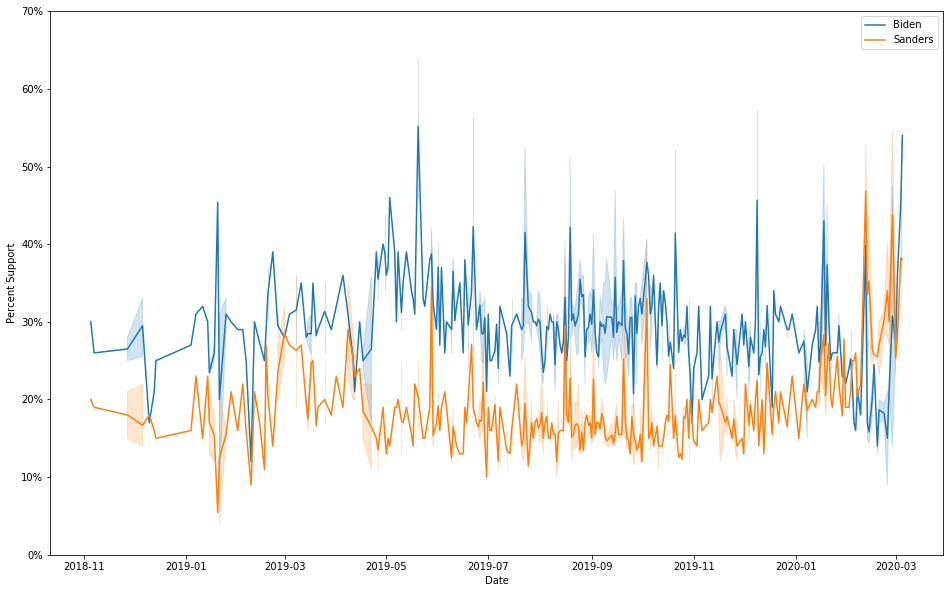

In [12]:
%matplotlib inline

plt.figure(figsize=(16,10))

for candidate in candidates:
    sns.lineplot(x = 'start_date', y = candidate + '-pct', data=data_clean, label = candidate)
#plt.xlim([np.datetime64('2019-07'),np.datetime64('2020-01')])

plt.ylabel('Percent Support')
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
new_labels
plt.yticks(yticks[0],new_labels)

plt.xlabel('Date')


### Smoothing

#### Polynomial Regression

In [13]:
data_clean_drop = data_clean.dropna(axis = 0)

In [14]:
data_clean_drop['date_ordinal'] = pd.to_datetime(data_clean_drop['start_date']).apply(lambda start_date: start_date.toordinal())
data_clean_drop[['start_date','date_ordinal']].head()

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,start_date,date_ordinal
119720,2020-03-05,737489
119698,2020-03-04,737488
119707,2020-03-04,737488
119708,2020-03-04,737488
119709,2020-03-04,737488


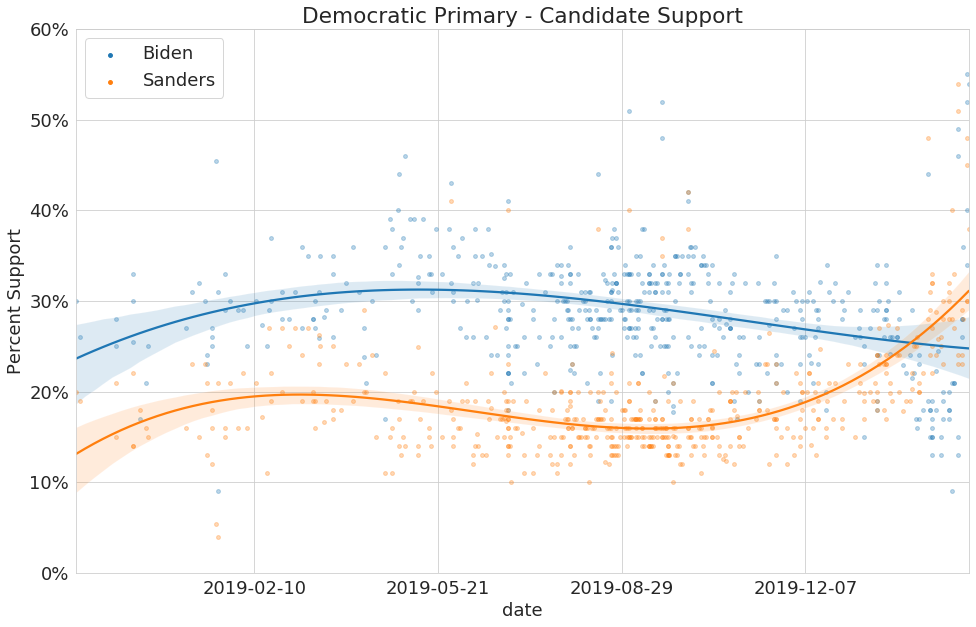

In [15]:
import warnings
import datetime
warnings.simplefilter('ignore', np.RankWarning)
import matplotlib

sns.set_style("whitegrid")

matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(16,10))
deg_order =20

for candidate in candidates:
    sns.regplot(x ='date_ordinal', y = data_clean_drop[candidate + '-pct'], data = data_clean_drop, order = deg_order, 
                truncate = True, scatter_kws={'s':15, 'alpha': 0.3}, label = candidate)

plt.legend()
plt.xlabel('date')
plt.xlim(data_clean_drop['date_ordinal'].min() - 1, data_clean_drop['date_ordinal'].max() + 1)#new_labels = [datetime.date.fromordinal(int(item)) for item in plt.xticks()]

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean_drop['start_date'].min(),data_clean_drop['start_date'].max())

plt.ylabel('Percent Support')
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
plt.yticks(yticks[0],new_labels)

plt.title('Democratic Primary - Candidate Support')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)


### Other ideas

Can use machine learning to predict poll biases for each candidate, and reweight based on how each poll favors a candidate

e.g. if Warren does 5 points better than average on a particular poll, machine learning can determine that, and then I can correct for it

### Machine Learning poll bias

First, learn based on date, pollster, population, and pollster's FiveThirtyEight rating

Then can later compare to the prediction based on date alone

In [16]:
attributes = ['date_ordinal','population','pollster_grade','pollster_id']
cat_attributes = ['population','pollster_grade']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_clean_prep = data_clean_drop[attributes]

for col in cat_attributes:
    data_clean_prep[col] = encoder.fit_transform(data_clean_prep[col])

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data_clean_prep.head()

,date_ordinal,population,pollster_grade,pollster_id
119720,737489,1,7,1189
119698,737488,2,6,744
119707,737488,0,6,744
119708,737488,0,6,744
119709,737488,2,6,744


In [19]:
data_clean_drop.index

Int64Index([119720, 119698, 119707, 119708, 119709, 119604, 119628, 119606,
            119598, 119599,
            ...
             92403,  92402,  92401,  92398,  94283,  92397,  92395,  92396,
             92393,  92392],
           dtype='int64', length=522)

In [20]:
from sklearn.model_selection import train_test_split

X = data_clean_prep
y_index = data_clean_drop.index

#y_butt = data_clean_drop['Buttigieg-pct']
#y_warren = data_clean_drop['Warren-pct']
y_biden = data_clean_drop['Biden-pct']
y_sanders = data_clean_drop['Sanders-pct']

X_train, X_valid, y_train_index, y_valid_index = train_test_split(X, y_index,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=42)


In [21]:
#y_train_butt = y_butt.loc[y_train_index]
#y_train_warren = y_warren.loc[y_train_index]
y_train_biden = y_biden.loc[y_train_index]
y_train_sanders = y_sanders.loc[y_train_index]

#y_valid_butt = y_butt.loc[y_valid_index]
#y_valid_warren = y_warren.loc[y_valid_index]
y_valid_biden = y_biden.loc[y_valid_index]
y_valid_sanders = y_sanders.loc[y_valid_index]



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#forest_model_butt = RandomForestRegressor(random_state = 42)
#forest_model_warren = RandomForestRegressor(random_state = 42)
forest_model_biden = RandomForestRegressor(random_state = 42)
forest_model_sanders = RandomForestRegressor(random_state = 42)

#forest_model_butt.fit(X_train,y_train_butt)
#forest_model_warren.fit(X_train,y_train_warren)
forest_model_biden.fit(X_train,y_train_biden)
forest_model_sanders.fit(X_train,y_train_sanders)


#butt_preds = forest_model_butt.predict(X_valid)
#warren_preds = forest_model_warren.predict(X_valid)
biden_preds = forest_model_biden.predict(X_valid)
sanders_preds = forest_model_sanders.predict(X_valid)

#print(mean_absolute_error(butt_preds,y_valid_butt))
#print(mean_absolute_error(warren_preds,y_valid_warren))
print(mean_absolute_error(biden_preds,y_valid_biden))
print(mean_absolute_error(sanders_preds,y_valid_sanders))

3.1676603174603173
3.0016126984126985


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Machine learning based on date of poll alone

In [23]:
X = X['date_ordinal']
X_train = X_train['date_ordinal']
X_valid = X_valid['date_ordinal']

X_train = np.array(X_train).reshape(-1,1)
X_valid = np.array(X_valid).reshape(-1,1)

In [24]:
#forest_model_butt_dates = RandomForestRegressor(random_state = 42)
#forest_model_warren_dates = RandomForestRegressor(random_state = 42)
forest_model_biden_dates = RandomForestRegressor(random_state = 42)
forest_model_sanders_dates = RandomForestRegressor(random_state = 42)

#forest_model_butt_dates.fit(X_train,y_train_butt)
#forest_model_warren_dates.fit(X_train,y_train_warren)
forest_model_biden_dates.fit(X_train,y_train_biden)
forest_model_sanders_dates.fit(X_train,y_train_sanders)


#butt_preds_dates = forest_model_butt_dates.predict(X_valid)
#warren_preds_dates = forest_model_warren_dates.predict(X_valid)
biden_preds_dates = forest_model_biden_dates.predict(X_valid)
sanders_preds_dates = forest_model_sanders_dates.predict(X_valid)

#print(mean_absolute_error(butt_preds_dates,y_valid_butt))
#print(mean_absolute_error(warren_preds_dates,y_valid_warren))
print(mean_absolute_error(biden_preds_dates,y_valid_biden))
print(mean_absolute_error(sanders_preds_dates,y_valid_sanders))

4.316156728456729
3.6727347419775995


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Continuing, can subtract the full predictions from the predictions based only on dates (after I run model on full dataset)

Then, can average the difference for a particular pollster, for a particular population sample, etc, to determine the bias factor

In [25]:
X = data_clean_prep

In [26]:
#forest_model_butt.fit(X,y_butt)
#forest_model_warren.fit(X,y_warren)
forest_model_biden.fit(X,y_biden)
forest_model_sanders.fit(X,y_sanders)

#butt_preds = forest_model_butt.predict(X)
#warren_preds = forest_model_warren.predict(X)
biden_preds = forest_model_biden.predict(X)
sanders_preds = forest_model_sanders.predict(X)

In [27]:
X_dates = np.array(X['date_ordinal']).reshape(-1,1)

#forest_model_butt_dates.fit(X_dates,y_butt)
#forest_model_warren_dates.fit(X_dates,y_warren)
forest_model_biden_dates.fit(X_dates,y_biden)
forest_model_sanders_dates.fit(X_dates,y_sanders)

#butt_preds_dates = forest_model_butt_dates.predict(X_dates)
#warren_preds_dates = forest_model_warren_dates.predict(X_dates)
biden_preds_dates = forest_model_biden_dates.predict(X_dates)
sanders_preds_dates = forest_model_sanders_dates.predict(X_dates)

In [28]:
#data_clean_drop['prediction_diff-Buttigieg'] = butt_preds - butt_preds_dates
#data_clean_drop['prediction_diff-Warren'] = warren_preds - warren_preds_dates
data_clean_drop['prediction_diff-Biden'] = biden_preds - biden_preds_dates
data_clean_drop['prediction_diff-Sanders'] = sanders_preds - sanders_preds_dates


/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### "House Effect" Adjustments

In [29]:
for pollster in data_clean_drop.pollster.unique():
    data_pollster = data_clean_drop[data_clean_drop['pollster'] == pollster]
    if data_pollster.pollster.count() > 5:
        print(pollster + ' (poll count: ' + str(data_pollster.pollster.count()) + ')')
      #  print('\t' + 'Buttigieg bias: ' + '%0.2f' % data_pollster['prediction_diff-Buttigieg'].mean())
     #   print('\t' + 'Warren bias: ' + '%0.2f' % data_pollster['prediction_diff-Warren'].mean())
        print('\t' + 'Biden bias: ' + '%0.2f' % data_pollster['prediction_diff-Biden'].mean())
        print('\t' + 'Sanders bias: ' + '%0.2f' % data_pollster['prediction_diff-Sanders'].mean())


Morning Consult (poll count: 77)
	Biden bias: 1.68
	Sanders bias: 1.70
Ipsos (poll count: 50)
	Biden bias: -2.28
	Sanders bias: -0.40
YouGov (poll count: 50)
	Biden bias: -1.40
	Sanders bias: -0.47
Harris Insights & Analytics (poll count: 178)
	Biden bias: 0.61
	Sanders bias: -0.44
IBD/TIPP (poll count: 8)
	Biden bias: 0.19
	Sanders bias: -0.82
Change Research (poll count: 13)
	Biden bias: -2.18
	Sanders bias: 1.29
SurveyUSA (poll count: 8)
	Biden bias: 1.13
	Sanders bias: 0.33
Fox News/Beacon Research/Shaw & Co. Research (poll count: 11)
	Biden bias: 0.67
	Sanders bias: 0.34
Emerson College (poll count: 16)
	Biden bias: 1.24
	Sanders bias: 3.72
NBC News/Wall Street Journal (poll count: 6)
	Biden bias: 0.47
	Sanders bias: -0.04
ABC News/Washington Post (poll count: 16)
	Biden bias: -1.15
	Sanders bias: 0.18
Zogby Interactive/JZ Analytics (poll count: 8)
	Biden bias: -0.31
	Sanders bias: 0.35
McLaughlin & Associates (poll count: 11)
	Biden bias: 0.25
	Sanders bias: -0.50
Monmouth Univer

In [30]:
#data_clean_drop['pollster_Buttigieg_bias'] = data_clean_drop.index
#data_clean_drop['pollster_Warren_bias'] = data_clean_drop.index
data_clean_drop['pollster_Biden_bias'] = data_clean_drop.index
data_clean_drop['pollster_Sanders_bias'] = data_clean_drop.index


/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
for pollster in data_clean_drop.pollster.unique():
    data_pollster = data_clean_drop[data_clean['pollster'] == pollster]
 #   data_clean_drop.replace({'pollster_Buttigieg_bias':np.array(data_pollster.index)},
  #                     data_pollster['prediction_diff-Buttigieg'].mean(),inplace = True)
   # data_clean_drop.replace({'pollster_Warren_bias':np.array(data_pollster.index)},
    #                   data_pollster['prediction_diff-Warren'].mean(),inplace = True)
    data_clean_drop.replace({'pollster_Biden_bias':np.array(data_pollster.index)},
                       data_pollster['prediction_diff-Biden'].mean(),inplace = True)
    data_clean_drop.replace({'pollster_Sanders_bias':np.array(data_pollster.index)},
                       data_pollster['prediction_diff-Sanders'].mean(),inplace = True)



/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/alec/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/alec/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [32]:
data_clean_drop.pollster_Biden_bias.head()

119720    1.684700
119698   -2.282849
119707   -2.282849
119708   -2.282849
119709   -2.282849
Name: pollster_Biden_bias, dtype: float64

In [33]:
#data_clean_drop['Buttigieg_adj'] = data_clean_drop['Buttigieg-pct'] - data_clean_drop['pollster_Buttigieg_bias']
#data_clean_drop['Warren_adj'] = data_clean_drop['Warren-pct'] - data_clean_drop['pollster_Warren_bias']
data_clean_drop['Biden_adj'] = data_clean_drop['Biden-pct'] - data_clean_drop['pollster_Biden_bias']
data_clean_drop['Sanders_adj'] = data_clean_drop['Sanders-pct'] - data_clean_drop['pollster_Sanders_bias']

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


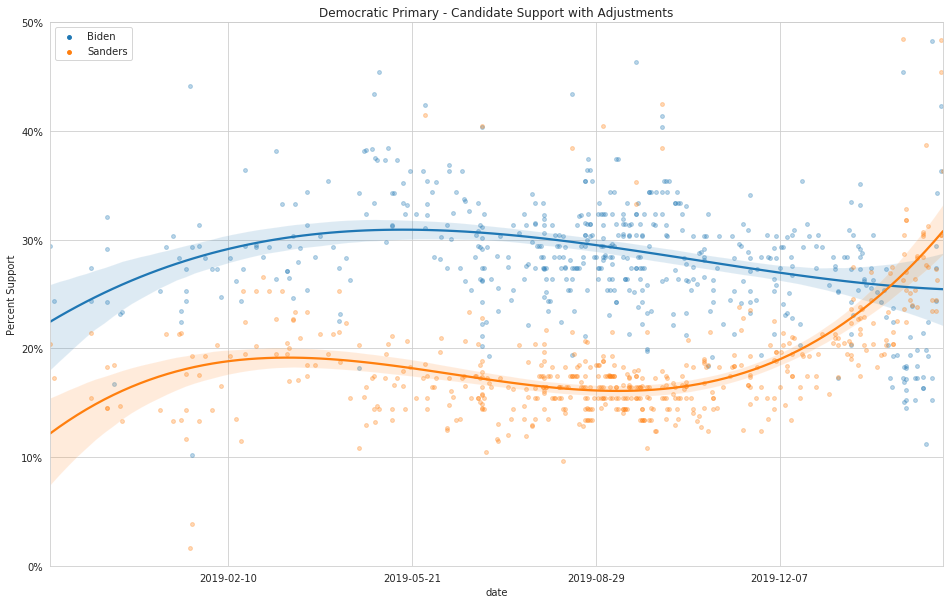

In [34]:
%matplotlib inline
plt.figure(figsize=(16,10))
deg_order =20

#sns.regplot(x ='date_ordinal', y = data_clean_drop['Buttigieg_adj'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha': 0.3}, label = "Buttigieg",color = 'blue')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Biden_adj'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha': 0.3}, label = "Biden")
sns.regplot(x ='date_ordinal', y = data_clean_drop['Sanders_adj'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha': 0.3}, label = "Sanders")
#sns.regplot(x ='date_ordinal', y = data_clean_drop['Warren_adj'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha': 0.3}, label = "Warren",color = (0.0,1,0.0))



plt.legend()
plt.xlabel('date')
plt.xlim(data_clean_drop['date_ordinal'].min() - 1, data_clean_drop['date_ordinal'].max() + 1)#new_labels = [datetime.date.fromordinal(int(item)) for item in plt.xticks()]

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean_drop['start_date'].min(),data_clean_drop['start_date'].max())

plt.ylabel('Percent Support')
plt.ylim(0,50)
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
plt.yticks(yticks[0],new_labels)

plt.title('Democratic Primary - Candidate Support with Adjustments')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [36]:
%matplotlib qt5
plt.figure(figsize=(16,10))
deg_order = 20

#sns.lineplot(x ='date_ordinal', y = data_clean_drop['Buttigieg_adj'], data = data_clean_drop, 
 #            label = "Buttigieg",color = 'blue')
sns.lineplot(x ='date_ordinal', y = data_clean_drop['Biden_adj'], data = data_clean_drop, 
             label = "Biden")
sns.lineplot(x ='date_ordinal', y = data_clean_drop['Sanders_adj'], data = data_clean_drop, 
             label = "Sanders")
#sns.lineplot(x ='date_ordinal', y = data_clean_drop['Warren_adj'], data = data_clean_drop, 
 #            label = "Warren",color = (0.0,1,0.0))



plt.legend()
plt.xlabel('date')
plt.xlim(data_clean_drop['date_ordinal'].min() - 1, data_clean_drop['date_ordinal'].max() + 1)#new_labels = [datetime.date.fromordinal(int(item)) for item in plt.xticks()]

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean_drop['start_date'].min(),data_clean_drop['start_date'].max())

plt.ylabel('Percent Support')
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
plt.yticks(yticks[0],new_labels)

plt.title('Democratic Primary - Candidate Support with Adjustments')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.show()